# Dataset Exploration

Univariate datasets:
- https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
- https://www.kaggle.com/datasets/vinaysidharth/temperature-vs-icecream-dataset
- https://www.kaggle.com/datasets/devansodariya/student-performance-data

Multivariate datasets:
- https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
- https://www.kaggle.com/datasets/shibumohapatra/house-price
- https://www.kaggle.com/datasets/jacksondivakarr/sample34


In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(".."))

from LinearRegression.utils.DataLoader import loadDatasetFromKaggle
from LinearRegression.models.UnivariateLinearModel import UnivariateLinearModel
from LinearRegression.models.MultivariateLinearModel import MultivariateLinearModel
from LinearRegression.models.RidgeRegression import RidgeRegression
from LinearRegression.models.LassoRegression import LassoRegression

salaryData = loadDatasetFromKaggle("abhishek14398/salary-dataset-simple-linear-regression")
iceCreamData = loadDatasetFromKaggle("vinaysidharth/temperature-vs-icecream-dataset")
univariateStudentData = loadDatasetFromKaggle("devansodariya/student-performance-data")

multivariateStudentData = loadDatasetFromKaggle("nikhil7280/student-performance-multiple-linear-regression")
californiaHousingData = loadDatasetFromKaggle("shibumohapatra/house-price")
carPricesData = loadDatasetFromKaggle("jacksondivakarr/sample34")


## Univariate Datasets

### Salary Dataset

In [250]:
salaryData = salaryData[["YearsExperience", "Salary"]]

print(f"Salary Dataset Shape: {salaryData.shape}")
salaryData.head()

Salary Dataset Shape: (30, 2)


YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0

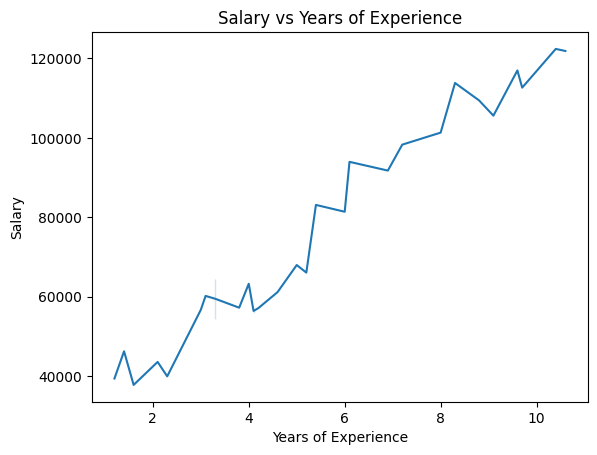

In [251]:
sns.lineplot(x="YearsExperience", y="Salary", data=salaryData)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.show()


In [252]:
# Print the number of missing values, forced 0s, NaNs, and empty strings
print("Number of missing values in Salary dataset:")
print(salaryData.isnull().sum())
print("Number of 0s in Salary dataset:")
print((salaryData == 0).sum())
print("Number of NaNs in Salary dataset:")
print(salaryData.isna().sum())
print("Number of empty strings in Salary dataset:")
print((salaryData == "").sum())

Number of missing values in Salary dataset:
YearsExperience    0
Salary             0
dtype: int64
Number of 0s in Salary dataset:
YearsExperience    0
Salary             0
dtype: int64
Number of NaNs in Salary dataset:
YearsExperience    0
Salary             0
dtype: int64
Number of empty strings in Salary dataset:
YearsExperience    0
Salary             0
dtype: int64


This dataset appears to already be clean and doesn't seem to require additional clean up

### Ice Cream Data

In [253]:
iceCreamData.head()

Temperature  Ice Cream Profits
0           39              13.17
1           40              11.88
2           41              18.82
3           42              18.65
4           43              17.02

Ice Cream Dataset Shape: (365, 2)


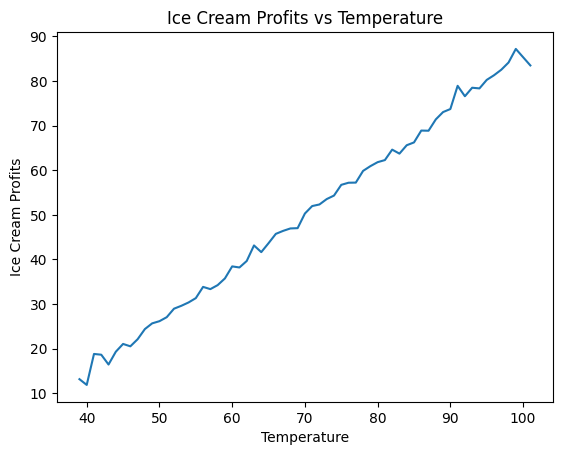

In [254]:
iceCreamData = iceCreamData[["Temperature", "Ice Cream Profits"]]

print(f"Ice Cream Dataset Shape: {iceCreamData.shape}")

sns.lineplot(x="Temperature", y="Ice Cream Profits", data=iceCreamData, errorbar=None)
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")
plt.title("Ice Cream Profits vs Temperature")
plt.show()

In [255]:
print("Number of missing values in Ice Cream dataset:")
print(iceCreamData.isnull().sum())
print("Number of 0s in Ice Cream dataset:")
print((iceCreamData == 0).sum())
print("Number of NaNs in Ice Cream dataset:")
print(iceCreamData.isna().sum())
print("Number of empty strings in Ice Cream dataset:")
print((iceCreamData == "").sum())

Number of missing values in Ice Cream dataset:
Temperature          0
Ice Cream Profits    0
dtype: int64
Number of 0s in Ice Cream dataset:
Temperature          0
Ice Cream Profits    0
dtype: int64
Number of NaNs in Ice Cream dataset:
Temperature          0
Ice Cream Profits    0
dtype: int64
Number of empty strings in Ice Cream dataset:
Temperature          0
Ice Cream Profits    0
dtype: int64


This dataset also seems to be alright and does not seem to require additional clean up

### Student Performance Data

In [256]:
univariateStudentData["Final Grade"] = ((univariateStudentData["G1"] + univariateStudentData["G2"] + univariateStudentData["G3"]) / 60 * 100).round(2)

studentData1 = univariateStudentData[["studytime", "Final Grade"]]
print(f"Student Dataset Shape: {studentData1.shape}")

print("Ranges of studytime and Final Grade:")
print(studentData1.describe())

studentData1.head()

Student Dataset Shape: (395, 2)
Ranges of studytime and Final Grade:
        studytime  Final Grade
count  395.000000   395.000000
mean     2.035443    53.396810
std      0.839240    18.483803
min      1.000000     6.670000
25%      1.000000    41.670000
50%      2.000000    53.330000
75%      2.000000    66.670000
max      4.000000    96.670000


studytime  Final Grade
0          2        28.33
1          2        26.67
2          2        41.67
3          3        73.33
4          2        43.33

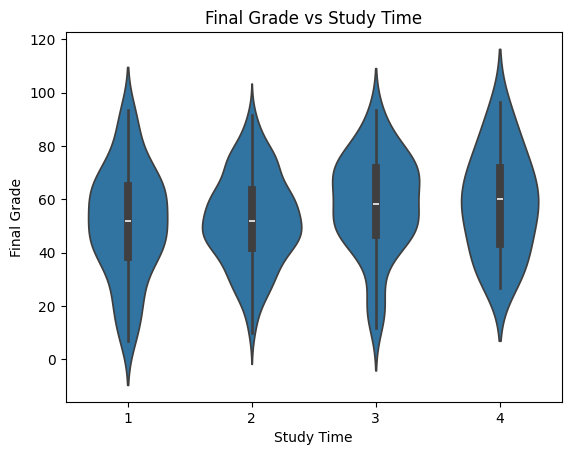

In [257]:
sns.violinplot(x="studytime", y="Final Grade", data=studentData1)
plt.xlabel("Study Time")
plt.ylabel("Final Grade")
plt.title("Final Grade vs Study Time")
plt.show()

In [258]:
print("Number of missing values in Student dataset:")
print(studentData1.isnull().sum())
print("Number of 0s in Student dataset:")
print((studentData1 == 0).sum())
print("Number of NaNs in Student dataset:")
print(studentData1.isna().sum())
print("Number of empty strings in Student dataset:")
print((studentData1 == "").sum())


Number of missing values in Student dataset:
studytime      0
Final Grade    0
dtype: int64
Number of 0s in Student dataset:
studytime      0
Final Grade    0
dtype: int64
Number of NaNs in Student dataset:
studytime      0
Final Grade    0
dtype: int64
Number of empty strings in Student dataset:
studytime      0
Final Grade    0
dtype: int64


Once again, this dataset shows no issues that we need to attent to at the moment. It can immediately be used for model testing

## Multivariate Datasets

### Student Performance Data

In [259]:
studentData2 = multivariateStudentData.copy()
studentData2["Extracurricular Activities"] = (studentData2["Extracurricular Activities"] == "yes").astype(int)
studentData2.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           0            9   
1              4               82                           0            4   
2              8               51                           0            7   
3              5               52                           0            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [260]:
print("Student Dataset Shape: ", studentData2.shape)
print("Ranges of studytime and Final Grade:")
print(studentData2.describe())
print("Number of missing values in Student dataset:")
print(studentData2.isnull().sum())

Student Dataset Shape:  (10000, 6)
Ranges of studytime and Final Grade:
       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                     10000.0   
mean        4.992900        69.445700                         0.0   
std         2.589309        17.343152                         0.0   
min         1.000000        40.000000                         0.0   
25%         3.000000        54.000000                         0.0   
50%         5.000000        69.000000                         0.0   
75%         7.000000        85.000000                         0.0   
max         9.000000        99.000000                         0.0   

        Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  10000.000000                      10000.000000       10000.000000  
mean       6.530600                          4.583300          55.224800  
std        1.695863                          2.867348          19.212558  
min   

In [261]:
print("Number of 0s in Student dataset:")
print((studentData2 == 0).sum())
print("Number of NaNs in Student dataset:")
print(studentData2.isna().sum())
print("Number of empty strings in Student dataset:")
print((studentData2 == "").sum())

# We'll drop the "Extracurricular Activities" column since all values are 0
studentData2 = studentData2.drop(columns=["Extracurricular Activities"])


Number of 0s in Student dataset:
Hours Studied                           0
Previous Scores                         0
Extracurricular Activities          10000
Sleep Hours                             0
Sample Question Papers Practiced      951
Performance Index                       0
dtype: int64
Number of NaNs in Student dataset:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Number of empty strings in Student dataset:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


<Figure size 800x600 with 0 Axes>

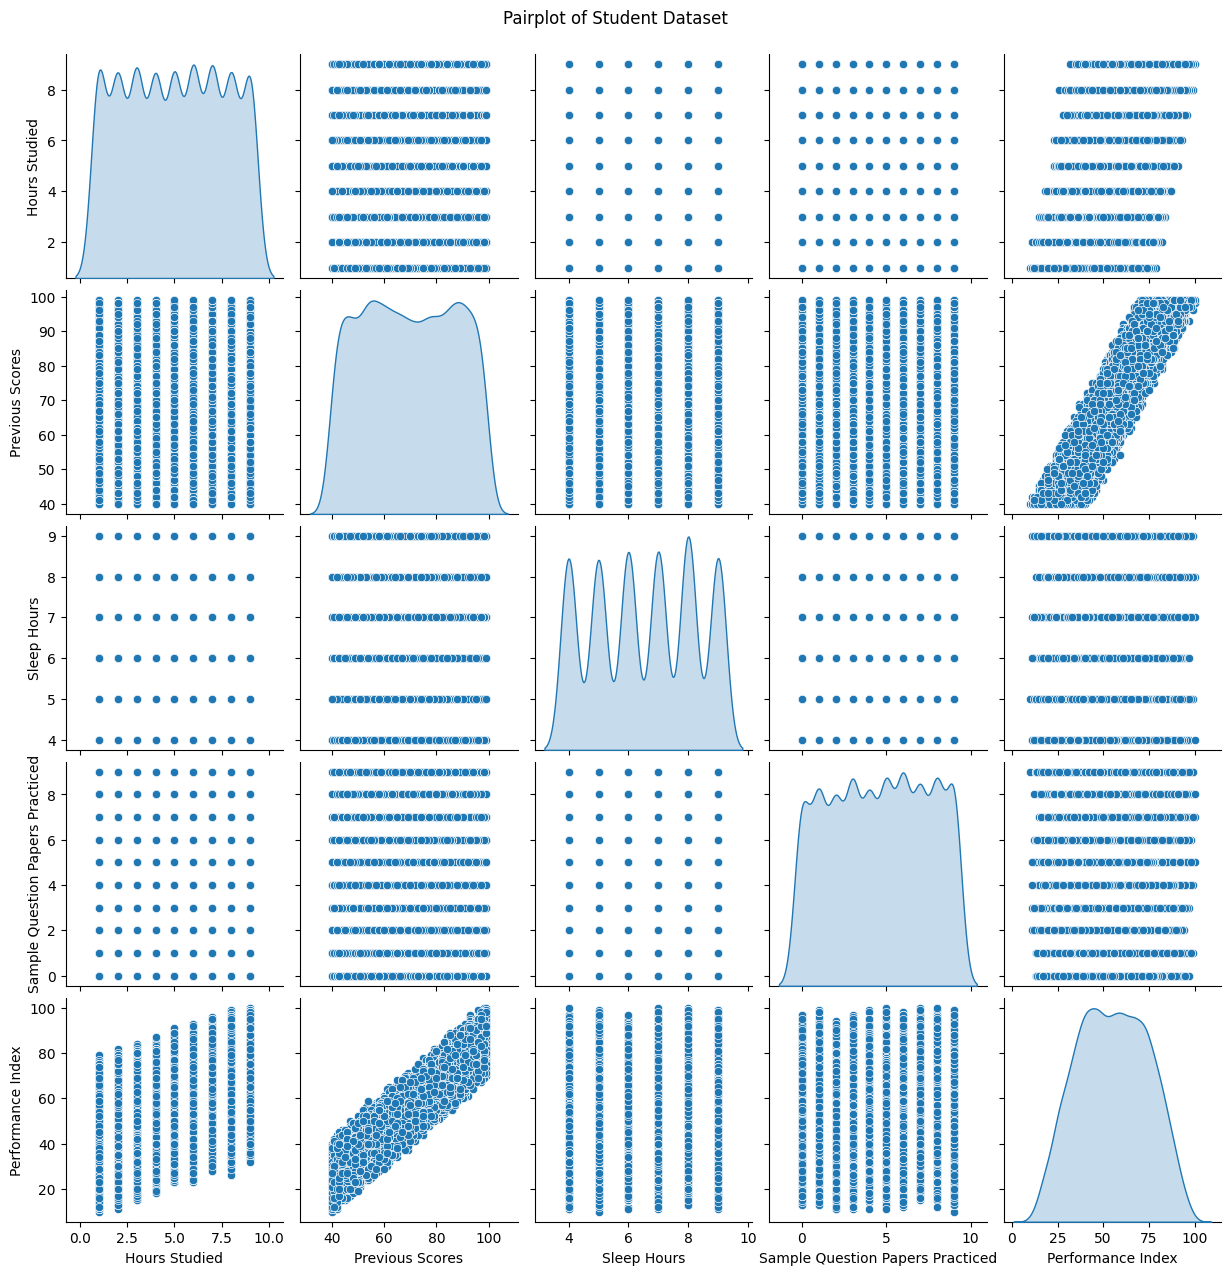

In [262]:
plt.figure(figsize=(8, 6))
sns.pairplot(studentData2, diag_kind="kde")
plt.suptitle("Pairplot of Student Dataset", y=1.02)
plt.show()

This dataset is already cleaned up and ready to be used for model testing

### California Housing Price Data

In [263]:
housingData = californiaHousingData.copy()
print("Housing Dataset Shape: ", housingData.shape)
housingData.head()

Housing Dataset Shape:  (20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [264]:
print(f"Unique values in ocean_proximity: {housingData['ocean_proximity'].unique()}")

# Manual One-Hot Encoding for ocean_proximity
housingData["LESS_THAN_1H_OCEAN"] = (housingData["ocean_proximity"] == "<1H OCEAN").astype(int)
housingData["INLAND"] = (housingData["ocean_proximity"] == "INLAND").astype(int)
housingData["NEAR_BAY"] = (housingData["ocean_proximity"] == "NEAR BAY").astype(int)
housingData["NEAR_OCEAN"] = (housingData["ocean_proximity"] == "NEAR OCEAN").astype(int)
housingData["ISLAND"] = (housingData["ocean_proximity"] == "ISLAND").astype(int)
housingData = housingData.drop(columns=["ocean_proximity"])

housingData.head()

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   LESS_THAN_1H_OCEAN  INLAND  NEAR_BAY  NEAR_OCEAN  ISLAND  
0                   0       0         1           0       0  
1                   0       0         1           0       0  
2                   0       0         1           0       0  
3                   0       0         1           0       0  
4                   0       0         1           0       0

In [265]:
print("Ranges of housing data:")
print(housingData.describe())

Ranges of housing data:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900

In [266]:
numericalHousingData = housingData.drop(columns=["LESS_THAN_1H_OCEAN", "INLAND", "NEAR_BAY", "NEAR_OCEAN", "ISLAND"])

print("Number of missing values in Housing dataset:")
print(numericalHousingData.isnull().sum())
print("Number of 0s in Housing dataset:")
print((numericalHousingData == 0).sum())
print("Number of NaNs in Housing dataset:")
print(numericalHousingData.isna().sum())
print("Number of empty strings in Housing dataset:")
print((numericalHousingData == "").sum())

Number of missing values in Housing dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64
Number of 0s in Housing dataset:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Number of NaNs in Housing dataset:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64
Number of empty strings in Housing dataset:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0


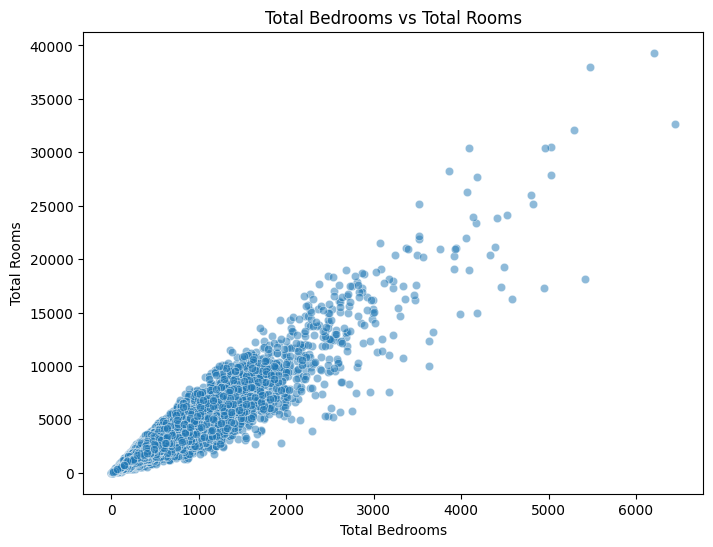

Number of missing values in Housing dataset after dropping rows with missing total_bedrooms:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
LESS_THAN_1H_OCEAN    0
INLAND                0
NEAR_BAY              0
NEAR_OCEAN            0
ISLAND                0
dtype: int64


In [267]:
# Plot relation between total_bedrooms and total_rooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x="total_bedrooms", y="total_rooms", data=numericalHousingData, alpha=0.5)
plt.xlabel("Total Bedrooms")
plt.ylabel("Total Rooms")
plt.title("Total Bedrooms vs Total Rooms")
plt.show()

# Drop rows with missing values in total_bedrooms
housingData = housingData.dropna(subset=["total_bedrooms"])

print("Number of missing values in Housing dataset after dropping rows with missing total_bedrooms:")
print(housingData.isnull().sum())


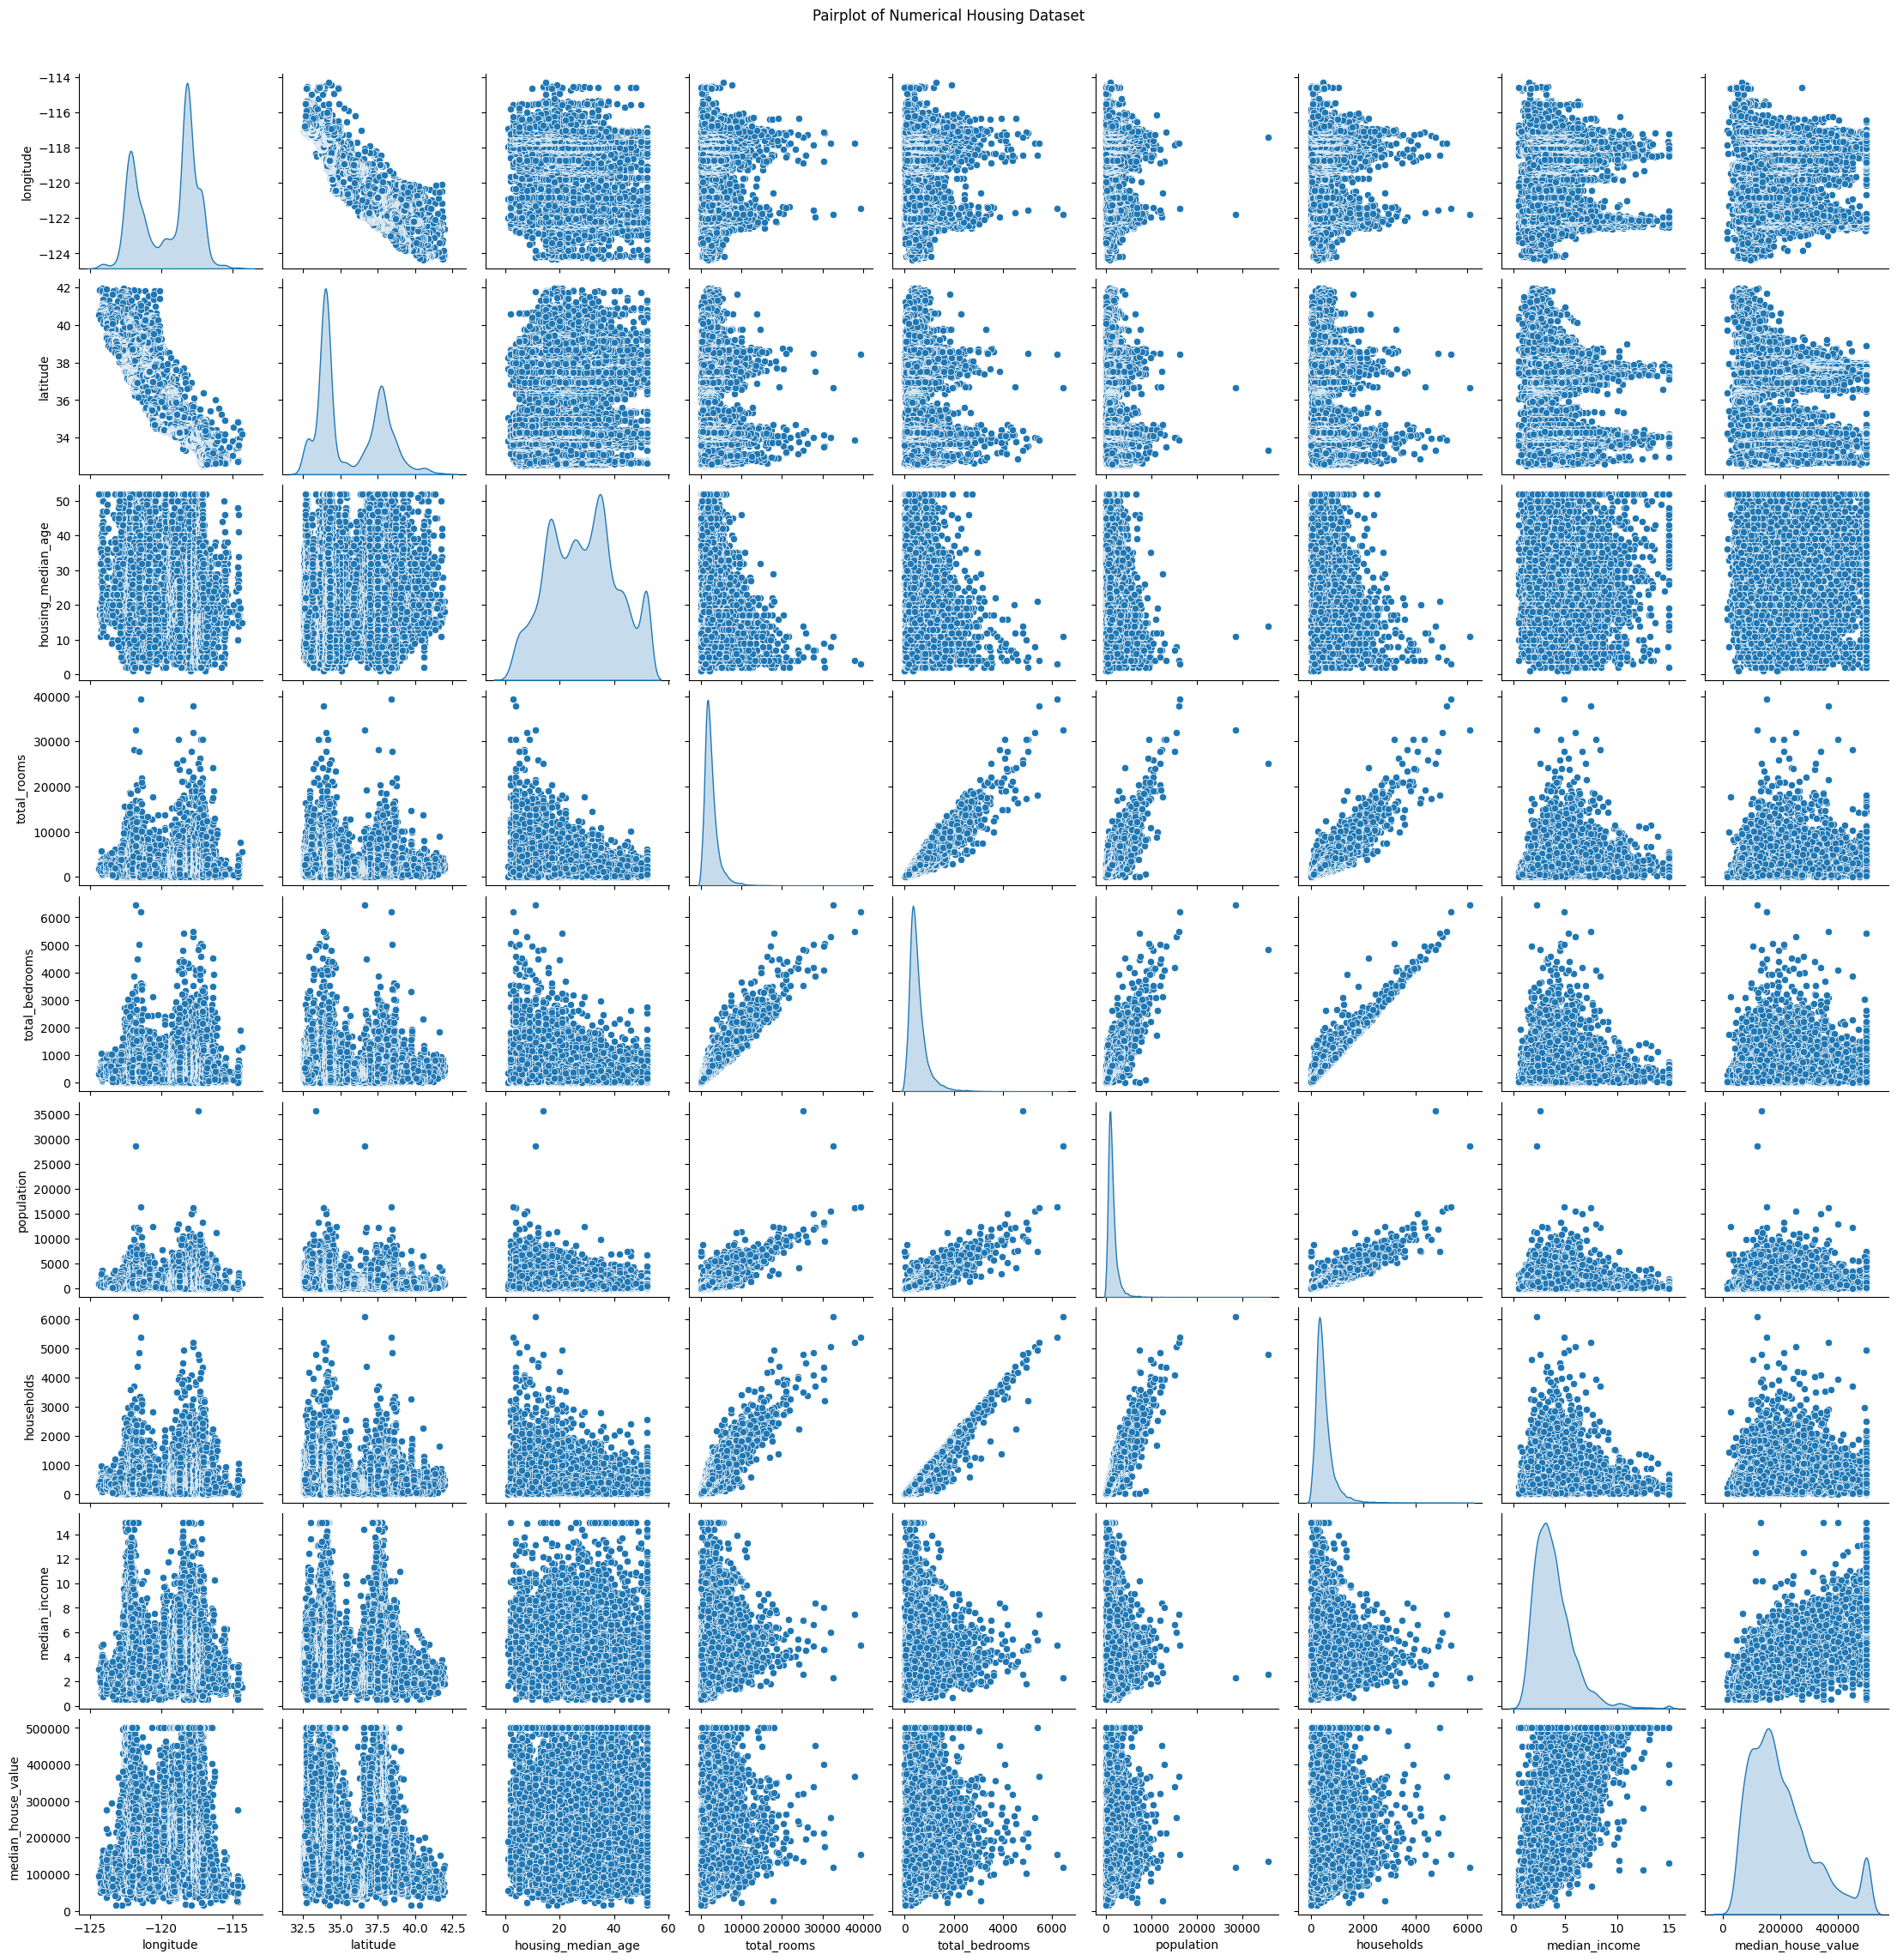

In [268]:
sns.pairplot(numericalHousingData, diag_kind="kde")
plt.suptitle("Pairplot of Numerical Housing Dataset", y=1.02)
plt.show()


We have a large dataset with no more missing values (dropping 200 data points out of over 20K won't harm our data or model performance)

### Car Price Data

In [269]:
carPrices = carPricesData.copy()
print("Car Prices Dataset Shape: ", carPrices.shape)
carPrices.head()

Car Prices Dataset Shape:  (2095, 14)


Unnamed: 0     name  year  selling_price  km_driven    fuel seller_type  \
0           0   Maruti  2014         450000     145500  Diesel  Individual   
1           2  Hyundai  2010         225000     127000  Diesel  Individual   
2           4  Hyundai  2017         440000      45000  Petrol  Individual   
3           7   Toyota  2011         350000      90000  Diesel  Individual   
4           8     Ford  2013         200000     169000  Diesel  Individual   

  transmission        owner  seats  max_power (in bph) Mileage Unit  Mileage  \
0       Manual  First Owner      5               74.00         kmpl    23.40   
1       Manual  First Owner      5               90.00         kmpl    23.00   
2       Manual  First Owner      5               81.86         kmpl    20.14   
3       Manual  First Owner      5               67.10         kmpl    23.59   
4       Manual  First Owner      5               68.10         kmpl    20.00   

   Engine (CC)  
0         1248  
1         1396  
2         1197  
3         1364  
4         1399

In [270]:
carPrices["Maruti"] = (carPrices["name"] == "Maruti").astype(int)
carPrices["Hyundai"] = (carPrices["name"] == "Hyundai").astype(int)
carPrices["Honda"] = (carPrices["name"] == "Honda").astype(int)
carPrices["Toyota"] = (carPrices["name"] == "Toyota").astype(int)
carPrices["Ford"] = (carPrices["name"] == "Ford").astype(int)
carPrices["Mahindra"] = (carPrices["name"] == "Mahindra").astype(int)
carPrices["Tata"] = (carPrices["name"] == "Tata").astype(int)
carPrices["Chevrolet"] = (carPrices["name"] == "Chevrolet").astype(int)
carPrices["Renault"] = (carPrices["name"] == "Renault").astype(int)
carPrices["Volkswagen"] = (carPrices["name"] == "Volkswagen").astype(int)
carPrices.drop("name", axis=1, inplace=True)

carPrices["Petrol"] = (carPrices["fuel"] == "Petrol").astype(int)
carPrices["Diesel"] = (carPrices["fuel"] == "Diesel").astype(int)
carPrices["CNG"] = (carPrices["fuel"] == "CNG").astype(int)
carPrices["LPG"] = (carPrices["fuel"] == "LPG").astype(int)
carPrices.drop("fuel", axis=1, inplace=True)

carPrices["Individual"] = (carPrices["seller_type"] == "Individual").astype(int)
carPrices["Dealer"] = (carPrices["seller_type"] == "Dealer").astype(int)
carPrices["TrustmarkDealer"] = (carPrices["seller_type"] == "Trustmark Dealer").astype(int)
carPrices.drop("seller_type", axis=1, inplace=True)

carPrices["Manual"] = (carPrices["transmission"] == "Manual").astype(int)
carPrices["Automatic"] = (carPrices["transmission"] == "Automatic").astype(int)
carPrices.drop("transmission", axis=1, inplace=True)

carPrices["FirstOwner"] = (carPrices["owner"] == "First Owner").astype(int)
carPrices["SecondOwner"] = (carPrices["owner"] == "Second Owner").astype(int)
carPrices["ThirdOwner"] = (carPrices["owner"] == "Third Owner").astype(int)
carPrices["Fourth&AboveOwner"] = (carPrices["owner"] == "Fourth & Above Owner").astype(int)
carPrices["TestDriveCar"] = (carPrices["owner"] == "Test Drive Car").astype(int)
carPrices.drop("owner", axis=1, inplace=True)

carPrices.drop("Mileage Unit", axis=1, inplace=True)

carPrices.describe()

Unnamed: 0         year  selling_price      km_driven        seats  \
count  2095.000000  2095.000000   2.095000e+03    2095.000000  2095.000000   
mean   3155.537947  2014.052506   4.272799e+05   67413.593795     5.096897   
std    1791.039215     3.273451   2.326698e+05   41580.846333     0.457000   
min       0.000000  2000.000000   4.595700e+04    1000.000000     4.000000   
25%    1589.500000  2012.000000   2.500000e+05   35000.000000     5.000000   
50%    3185.000000  2014.000000   3.900000e+05   60000.000000     5.000000   
75%    4709.500000  2017.000000   5.555000e+05   90000.000000     5.000000   
max    6256.000000  2020.000000   1.594000e+06  270000.000000     8.000000   

       max_power (in bph)      Mileage  Engine (CC)       Maruti      Hyundai  \
count         2095.000000  2095.000000  2095.000000  2095.000000  2095.000000   
mean            77.410427    21.397928  1205.078282     0.439618     0.272554   
std             19.884938     1.209234   245.058696     0.496459     0.445379   
min             35.000000    19.600000   624.000000     0.000000     0.000000   
25%             67.040000    20.360000   998.000000     0.000000     0.000000   
50%             74.000000    21.100000  1248.000000     0.000000     0.000000   
75%             88.730000    22.540000  1396.000000     1.000000     1.000000   
max            126.320000    23.590000  1598.000000     1.000000     1.000000   

       ...   Individual       Dealer  TrustmarkDealer       Manual  \
count  ...  2095.000000  2095.000000      2095.000000  2095.000000   
mean   ...     0.915990     0.080668         0.003341     0.952745   
std    ...     0.277468     0.272390         0.057721     0.212235   
min    ...     0.000000     0.000000         0.000000     0.000000   
25%    ...     1.000000     0.000000         0.000000     1.000000   
50%    ...     1.000000     0.000000         0.000000     1.000000   
75%    ...     1.000000     0.000000         0.000000     1.000000   
max    ...     1.000000     1.000000         1.000000     1.000000   

         Automatic   FirstOwner  SecondOwner   ThirdOwner  Fourth&AboveOwner  \
count  2095.000000  2095.000000  2095.000000  2095.000000        2095.000000   
mean      0.047255     0.632458     0.279714     0.069690           0.017661   
std       0.212235     0.482251     0.448966     0.254684           0.131748   
min       0.000000     0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.000000     0.000000     0.000000           0.000000   
50%       0.000000     1.000000     0.000000     0.000000           0.000000   
75%       0.000000     1.000000     1.000000     0.000000           0.000000   
max       1.000000     1.000000     1.000000     1.000000           1.000000   

       TestDriveCar  
count   2095.000000  
mean       0.000477  
std        0.021848  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 32 columns]

In [271]:
numericalCarPricesData = carPrices[["year",	"selling_price", "km_driven", "seats", "max_power (in bph)", "Mileage",	"Engine (CC)"]]

print("Number of missing values in Car Prices dataset:")
print(numericalCarPricesData.isnull().sum())
print("Number of 0s in Car Prices dataset:")
print((numericalCarPricesData == 0).sum())
print("Number of NaNs in Car Prices dataset:")
print(numericalCarPricesData.isna().sum())
print("Number of empty strings in Car Prices dataset:")
print((numericalCarPricesData == "").sum())

Number of missing values in Car Prices dataset:
year                  0
selling_price         0
km_driven             0
seats                 0
max_power (in bph)    0
Mileage               0
Engine (CC)           0
dtype: int64
Number of 0s in Car Prices dataset:
year                  0
selling_price         0
km_driven             0
seats                 0
max_power (in bph)    0
Mileage               0
Engine (CC)           0
dtype: int64
Number of NaNs in Car Prices dataset:
year                  0
selling_price         0
km_driven             0
seats                 0
max_power (in bph)    0
Mileage               0
Engine (CC)           0
dtype: int64
Number of empty strings in Car Prices dataset:
year                  0
selling_price         0
km_driven             0
seats                 0
max_power (in bph)    0
Mileage               0
Engine (CC)           0
dtype: int64


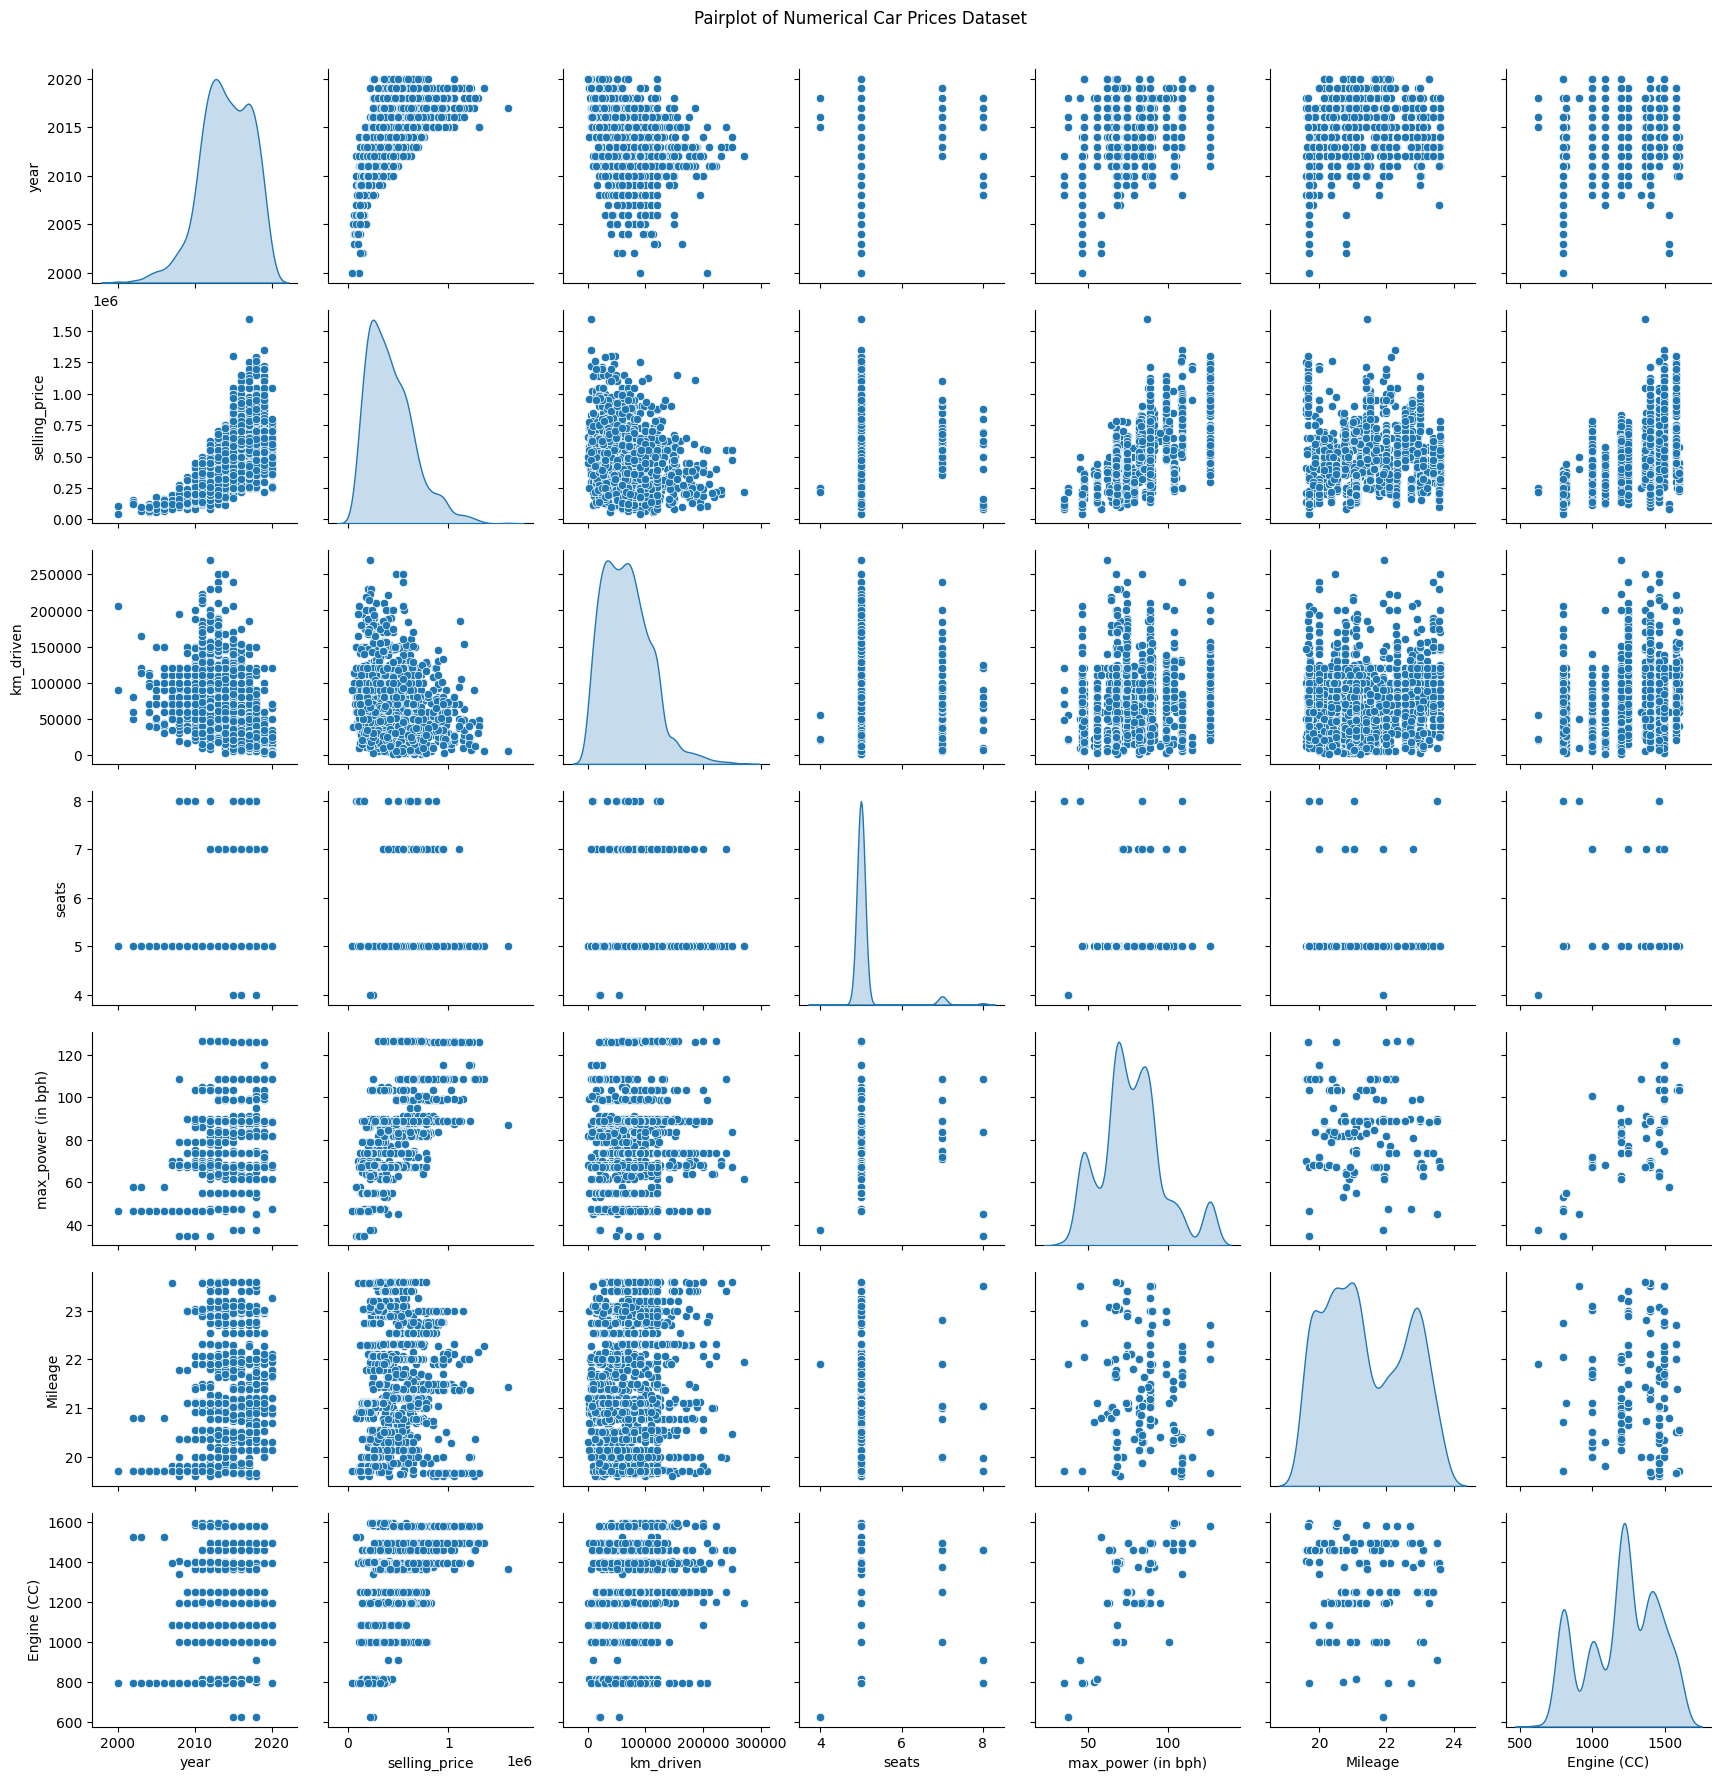

In [272]:
sns.pairplot(numericalCarPricesData, diag_kind="kde")
plt.suptitle("Pairplot of Numerical Car Prices Dataset", y=1.02)
plt.show()

The data seems to be clean apart from searching for outliers in the data which could be problematic. It would also be interesting to attempt to compare the model's performance using the dataset using only the numerical columns or using the one-hot encoded features in addition to the numerical columns